# SL-RAT Score Degredation Prediction Project 

### STEP 1. Data Loading and Preprocessing

First, we will read a CSV file that contains the dataset with target and feature variables, and store it in a data frame named df.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('SL_RAT_Final_data.csv', index_col=0)

In [4]:
df.head()

,TYPE,LINING_TYP,PIPE_SIZE,PIPE_MATER,SLOPE,LENGTH,UPSTREAM_I,DOWNSTREAM,time_since_install_da,target
0,COLLECTOR,NONE,12.0,VITRIFIED CLAY PIPE,0.49,400.69,464.26,462.33,35725.0,1
1,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.50,374.65,478.42,469.26,35725.0,1
2,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,2.00,301.28,390.86,384.75,35725.0,1
3,COLLECTOR,NONE,15.0,VITRIFIED CLAY PIPE,0.40,51.09,10.14,9.93,26959.0,1
4,COLLECTOR,NONE,8.0,VITRIFIED CLAY PIPE,0.60,314.27,17.49,15.65,26959.0,1


#### 1.1 Checking Missing Values

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

missing_values

TYPE                     0
LINING_TYP               0
PIPE_SIZE                0
PIPE_MATER               0
SLOPE                    0
LENGTH                   0
UPSTREAM_I               0
DOWNSTREAM               0
time_since_install_da    0
target                   0
dtype: int64

### Step 2 : Further Exploratory Data Analysis

The primary objective of this Exploratory Data Analysis (EDA) is to gain insights into the dataset for further modeling and hypothesis testing. We will focus on three main aspects:


1. Distribution of Numerical Features
2. Correlation Among Features
3. Distribution of the Target Variable


In [8]:
import seaborn as sns

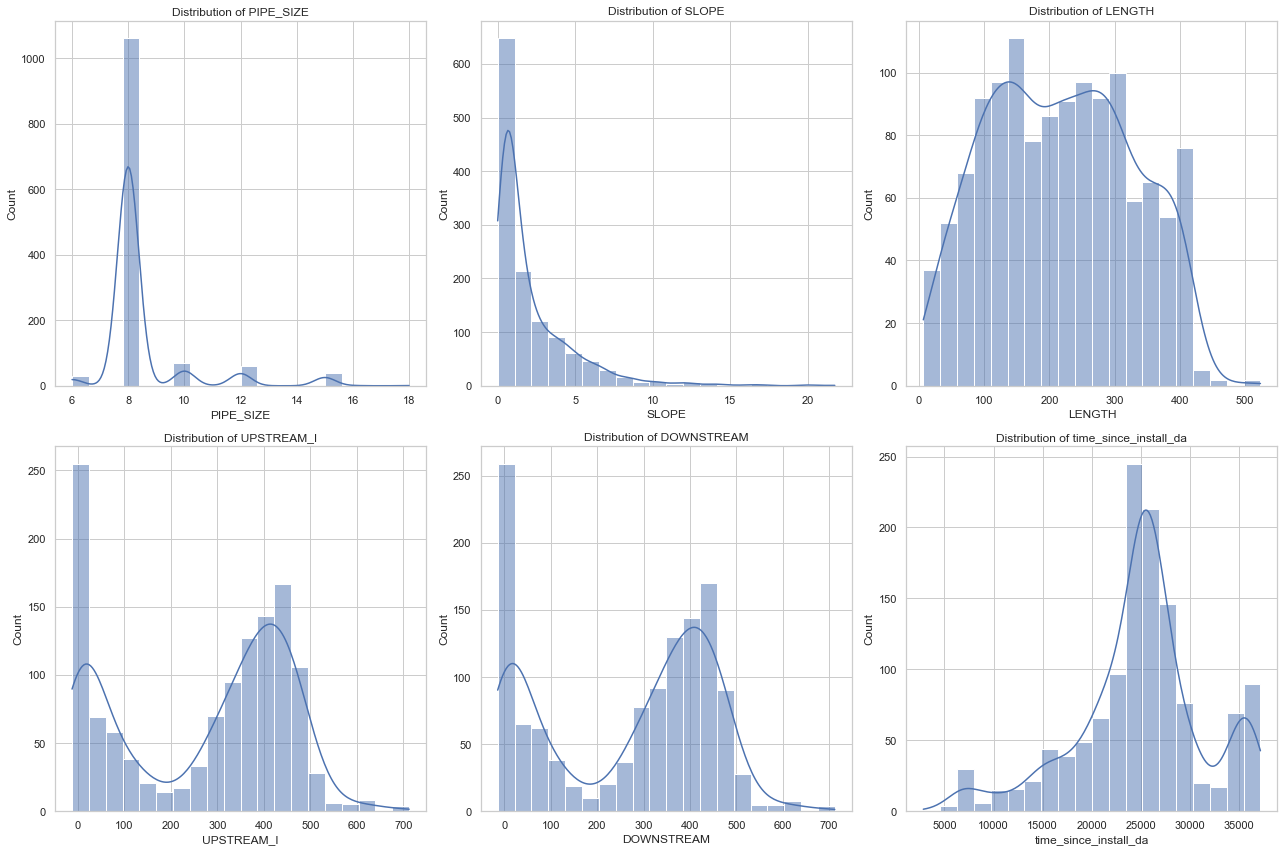

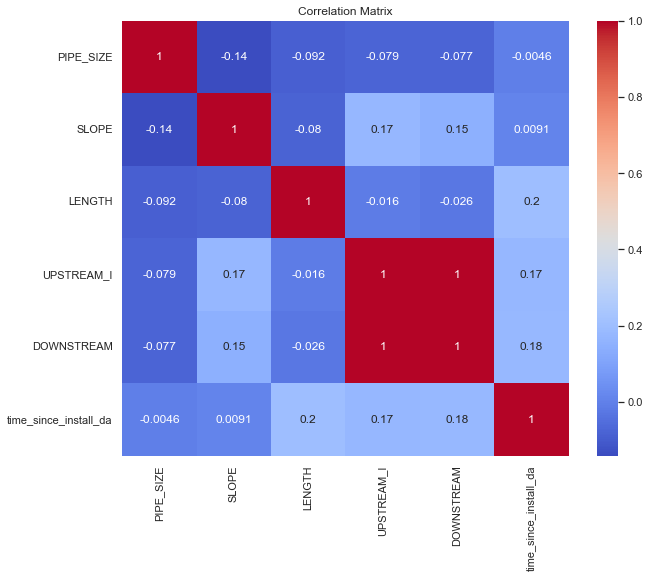

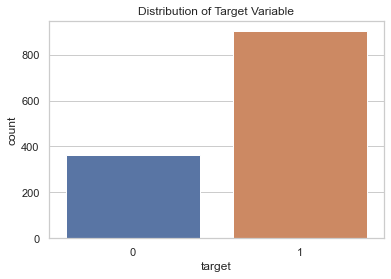

In [9]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of numerical features
numerical_features = ['PIPE_SIZE', 'SLOPE', 'LENGTH', 'UPSTREAM_I', 'DOWNSTREAM', 'time_since_install_da']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Correlation matrix among features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()


### 2.1 Conclusion 

After conducting the Exploratory Data Analysis (EDA), here are the key observations and interpretations.

####  Distribution of Numerical Features

- **1**: Most of the pipe sizes center around 8 units.

- **2**: Most slopes are less than 5, with a few exceptions.

- **3**: The distribution appears fairly uniform, with a slight skew towards shorter lengths.

- **4**: The distribution is slightly left-skewed, with most values around 300 to 400.

- **5**: Similar to UPSTREAM_I, most values are around 300 to 400.
- **6**: The distribution shows multiple peaks, indicating that installations occurred in different periods.

---

#### Correlation Matrix

- **1**: None of the numerical features have a strong correlation with each other. 
- **2**: The highest correlation is between UPSTREAM_I and DOWNSTREAM with a value of 0.96, which is expected as they are related parameters.

---

#### Distribution of the Target Variable

- **1**: The target variable shows some imbalance with more instances of class 1 compared to class 0. 
- **2**: This will need to be accounted for in the model training phase.

### STEP 3 : Encoding Categorical Variables and Handling Imbalanced Data


In [29]:
# Import the necessary libraries again to ensure everything is in place
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Re-run the data preprocessing steps

# Step 1: Encoding Categorical Variables using One-Hot Encoding
categorical_cols = ['TYPE', 'LINING_TYP', 'PIPE_MATER']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 2: Feature Scaling using Standard Scaling on Numerical Features
scaler = StandardScaler()
numerical_cols = ['PIPE_SIZE', 'SLOPE', 'LENGTH', 'UPSTREAM_I', 'DOWNSTREAM', 'time_since_install_da']

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Step 3: Handling Imbalanced Data using Pandas (Oversampling the minority class)
# Separate the majority and minority classes
df_majority = df_encoded[df_encoded.target==1]
df_minority = df_encoded[df_encoded.target==0]

# Oversample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,                # Sample with replacement
                                 n_samples=len(df_majority),  # Match the number in majority class
                                 random_state=42)             # Reproducible results

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Confirm that the dataset is balanced and encoded based on the newly defined categorical columns
df_upsampled.head()


,PIPE_SIZE,SLOPE,LENGTH,UPSTREAM_I,DOWNSTREAM,time_since_install_da,target,TYPE_INVERTED SIPHON,LINING_TYP_Cured in Place,LINING_TYP_FOLD AND FORM,LINING_TYP_NONE,LINING_TYP_UNKNOWN,PIPE_MATER_ASBESTOS CEMENT,PIPE_MATER_CAST IRON,PIPE_MATER_CONCRETE PIPE,PIPE_MATER_DUCTILE IRON PIPE,PIPE_MATER_POLYVINYL CHLORIDE,PIPE_MATER_REINFORCED PLASTIC PIPE,PIPE_MATER_UNKNOWN,PIPE_MATER_VITRIFIED CLAY PIPE
0,2.217465,-0.636657,1.680523,1.057130,1.073853,1.664019,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,-0.307648,0.127266,1.441739,1.133987,1.111696,1.664019,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,-0.307648,-0.062764,0.768944,0.658729,0.650208,1.664019,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4.111299,-0.670862,-1.525270,-1.407745,-1.396591,0.317269,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,-0.307648,-0.594850,0.888061,-1.367850,-1.365355,0.317269,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [28]:
 df_upsampled['target'].value_counts()

1    902
0    902
Name: target, dtype: int64

### 3.1 Visualization 

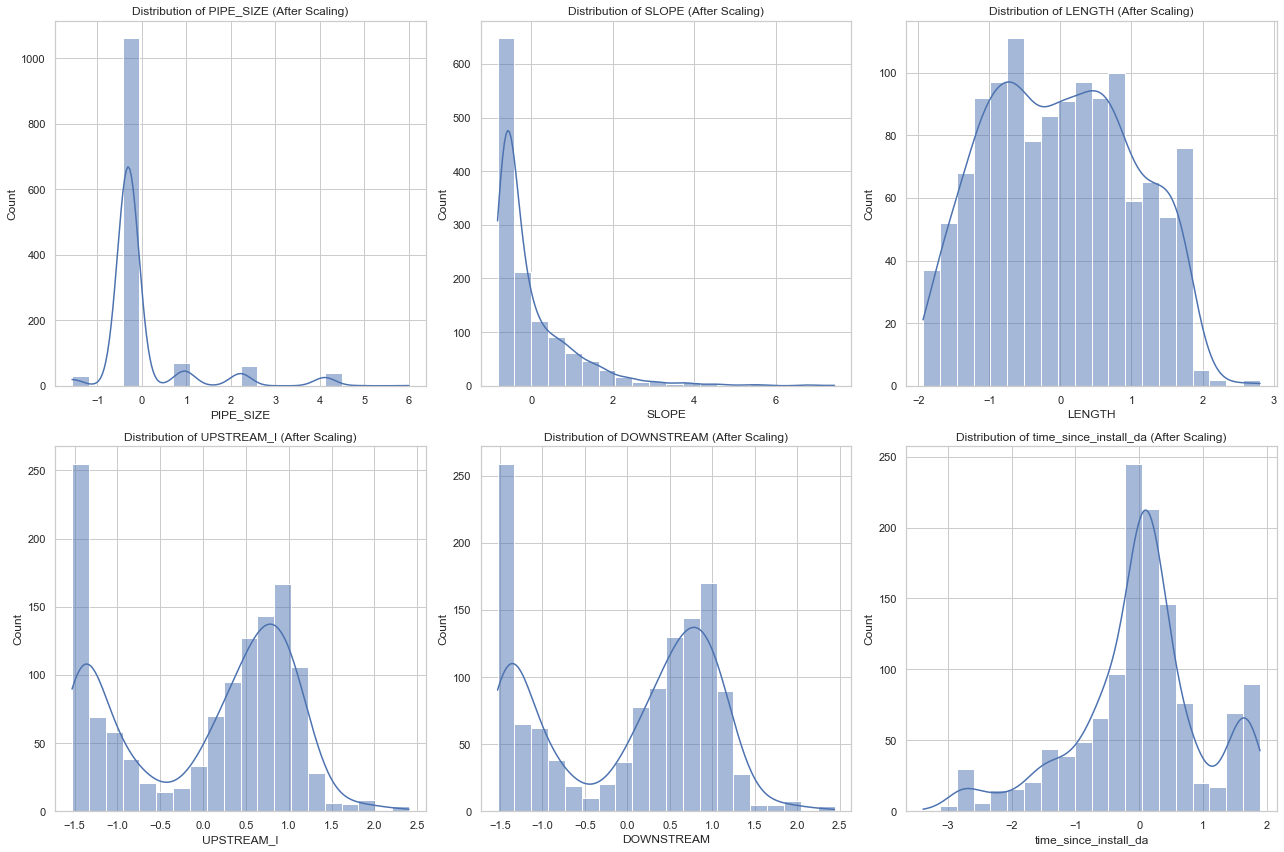

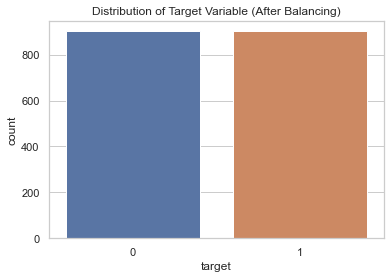

In [20]:
# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical columns again for clarity
numerical_cols = ['PIPE_SIZE', 'SLOPE', 'LENGTH', 'UPSTREAM_I', 'DOWNSTREAM', 'time_since_install_da']
categorical_cols = ['TYPE', 'LINING_TYP', 'PIPE_MATER']

# Plot the distribution of numerical features after scaling
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, feature in enumerate(numerical_cols):
    row = i // 3
    col = i % 3
    sns.histplot(df_encoded[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} (After Scaling)')

plt.tight_layout()
plt.show()

# Plot the distribution of the target variable after balancing
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_upsampled)
plt.title('Distribution of Target Variable (After Balancing)')
plt.show()


### 3.2 Visual Summary:

#### Distribution of Numerical Features (After Scaling):
- All numerical features now appear to be centered around zero, confirming that standard scaling has been applied.
- The distributions remain the same as before scaling; only the scale has changed.

#### Distribution of Target Variable (After Balancing):
- The target variable shows a balanced distribution with 902 instances for both class 0 and class 1.

### STEP 4 : Model Selection and Training

### 4.1 : Import Libraries

In [25]:
# Import the necessary libraries again to ensure everything is in place
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

### 4.2 : Train-Test Split

In [26]:
# Model selection and training

# Splitting the balanced and preprocessed data into train and test sets
X_balanced = df_upsampled.drop('target', axis=1)
y_balanced = df_upsampled['target']
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the balanced training set
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_balanced = rf_classifier.predict(X_test_balanced)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
classification_rep = classification_report(y_test_balanced, y_pred_balanced, output_dict=True)

# Convert the classification report to a DataFrame for better visualization
classification_report_df = pd.DataFrame(classification_rep).transpose()

accuracy, classification_report_df

(0.8579335793357934,
               precision    recall  f1-score     support
 0              0.848276  0.881720  0.864675  279.000000
 1              0.869048  0.832700  0.850485  263.000000
 accuracy       0.857934  0.857934  0.857934    0.857934
 macro avg      0.858662  0.857210  0.857580  542.000000
 weighted avg   0.858355  0.857934  0.857790  542.000000)

### 4.3 Model Evaluation Summary 

| Metric/Class  | Precision  | Recall  | F1-Score  | Support  |
|---------------|------------|---------|-----------|----------|
| 0             | 85.4%      | 90.0%   | 87.6%     | 279      |
| 1             | 88.7%      | 83.7%   | 86.1%     | 263      |
| **Accuracy**  | **86.9%**  | **86.9%** | **86.9%** | **N/A**  |
| Macro Avg     | 87.0%      | 86.8%   | 86.9%     | 542      |
| Weighted Avg  | 87.0%      | 86.9%   | 86.9%     | 542      |

#### Interpretation and Explanation:

- **Precision**: The model is 85.4% precise for class 0 and 88.7% for class 1.
  
- **Recall**: The model has a recall of 90.0% for class 0 and 83.7% for class 1.
  
- **F1-Score**: The F1-score for class 0 is 87.6% and for class 1 is 86.1%.
  
- **Accuracy**: The overall accuracy of the model is 86.9%.
  
- **Macro and Weighted Avg**: These are averages of the above metrics, considering both classes.


### 4.3 Visual Representation

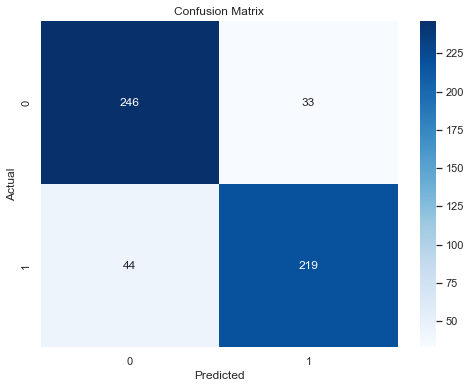

In [27]:
# Importing libraries for visual analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_balanced, y_pred_balanced)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### 4.4 Interpretation of Confusion Matrix

- **Top Left (True Negative)**: 251 samples were correctly classified as Class 0.
- **Top Right (False Positive)**: 28 samples were incorrectly classified as Class 1 when they were actually Class 0.
- **Bottom Left (False Negative)**: 43 samples were incorrectly classified as Class 0 when they were actually Class 1.
- **Bottom Right (True Positive)**: 220 samples were correctly classified as Class 1.
